In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
import acquire as a
import os

# Exercises

## The end result of this exercise should be a file named prepare.py.

## Using your store items data:

In [2]:
df = a.wrangle_store_data()

In [4]:
df.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  object 
 3   item_upc12     913000 non-null  object 
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 97.5+ MB


#### Convert date column to datetime format.

In [12]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [15]:
df['sale_date']

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

#### Plot the distribution of sale_amount and item_price.

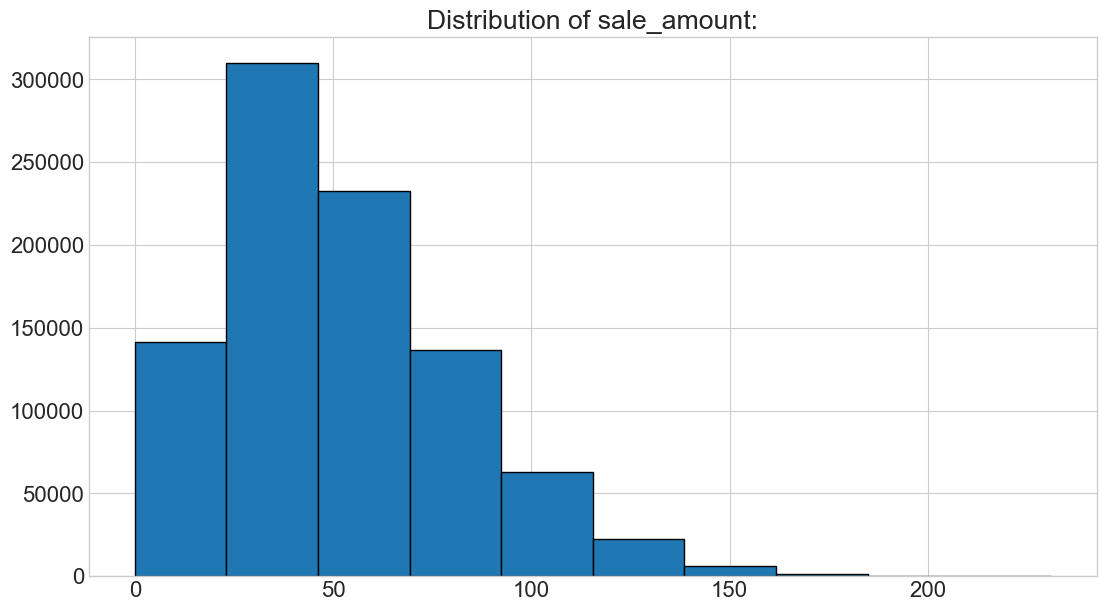

In [16]:
plt.hist(df['sale_amount'], edgecolor='black')
plt.title(f'Distribution of sale_amount:')
plt.show()

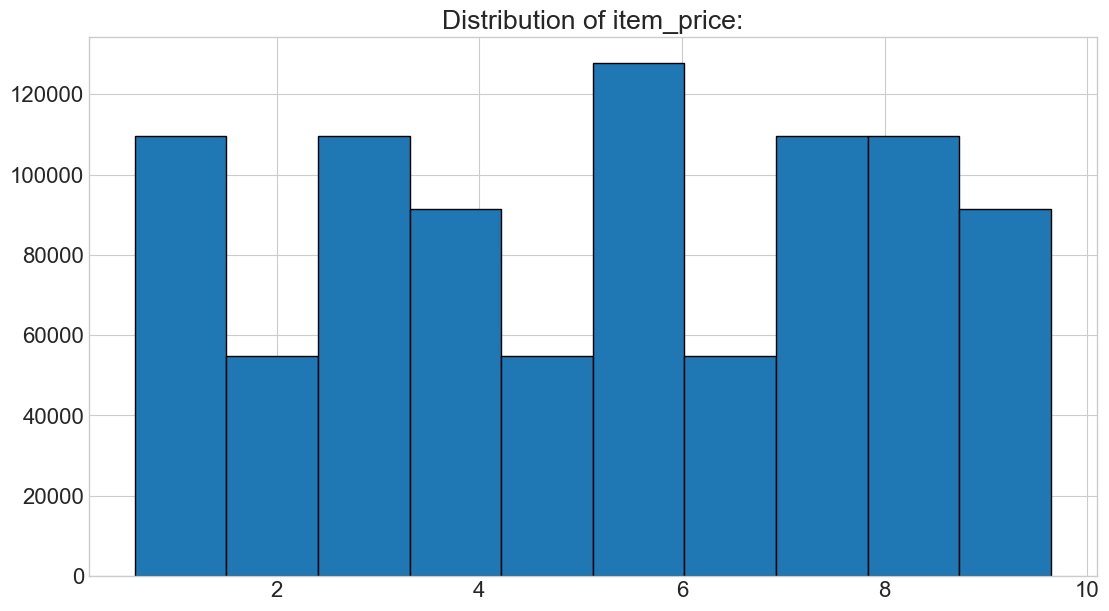

In [17]:
plt.hist(df['item_price'], edgecolor='black')
plt.title(f'Distribution of item_price:')
plt.show()

#### Set the index to be the datetime variable.


In [18]:
df = df.set_index('sale_date').sort_index()

#### Add a 'month' and 'day of week' column to your dataframe.


In [19]:
df['month'] = df.index.month_name()

In [26]:
df['day_of_week'] = df.index.day_name()

In [27]:
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,2


#### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [28]:
df['sales_total'] = df['sale_amount'] * df['item_price']

In [29]:
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,2,308.48


#### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [56]:
def prepare_store_items(df):
    '''
    prepare_store_items takes in store items df, converts date column to datetype
    dtype, sets it as the index, adds comuns for month, day of the week, and sales 
    total. 
    '''
    # set col as datetime
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    # set col as index
    df = df.set_index('sale_date').sort_index()
    # create month column
    df['month'] = df.index.month_name()
    # create day of week column
    df['day_of_week'] = df.index.day_name()
    # create sales total column
    df['sales_total'] = df['sale_amount'] * df['item_price']
    # return reconstructed df
    return df

In [59]:
df = a.wrangle_store_data()

In [61]:
df = prepare_store_items(df)

In [62]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [47]:
df = a.get_germany_ops_data()

In [31]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


####  Convert date column to datetime format.

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

####  Plot the distribution of each of your variables.

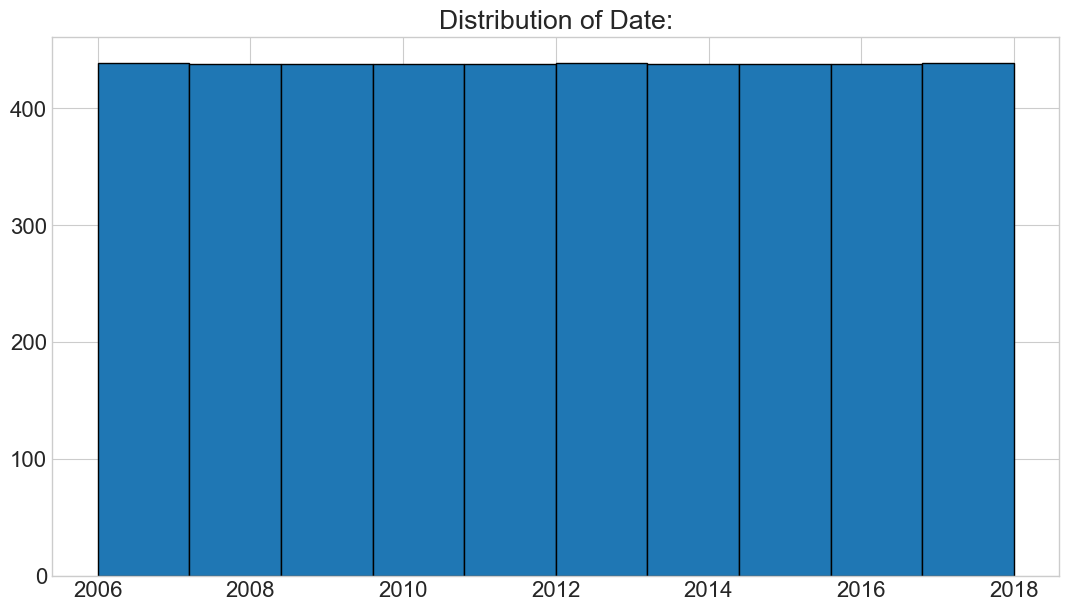

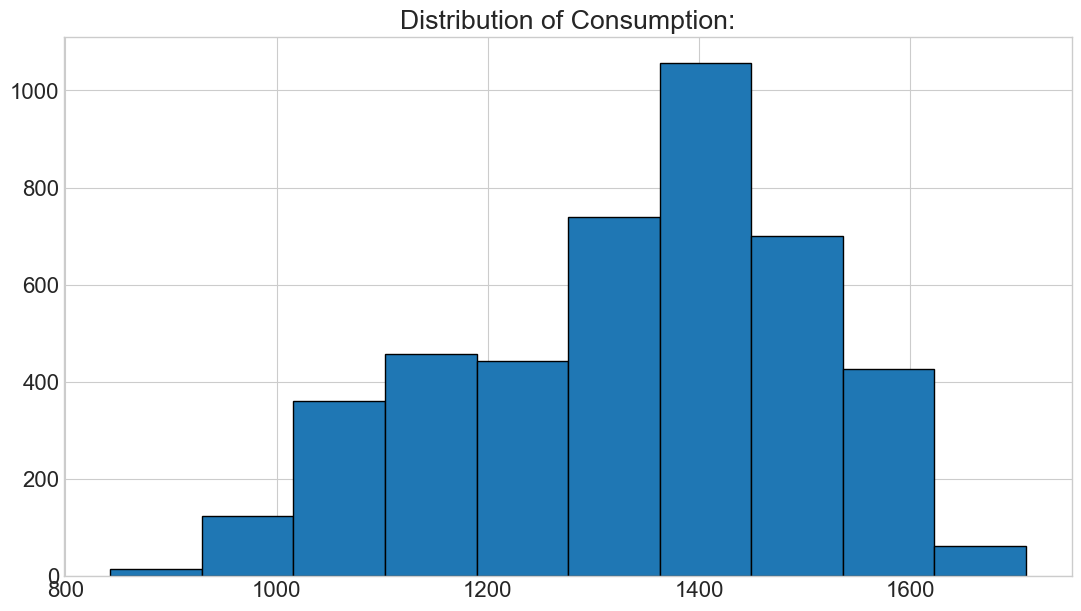

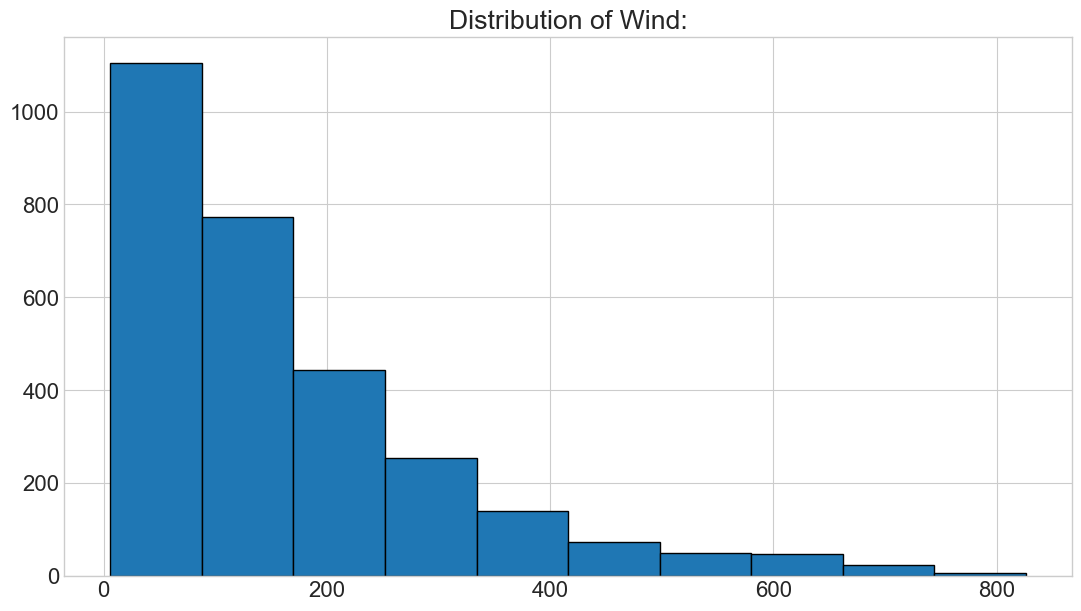

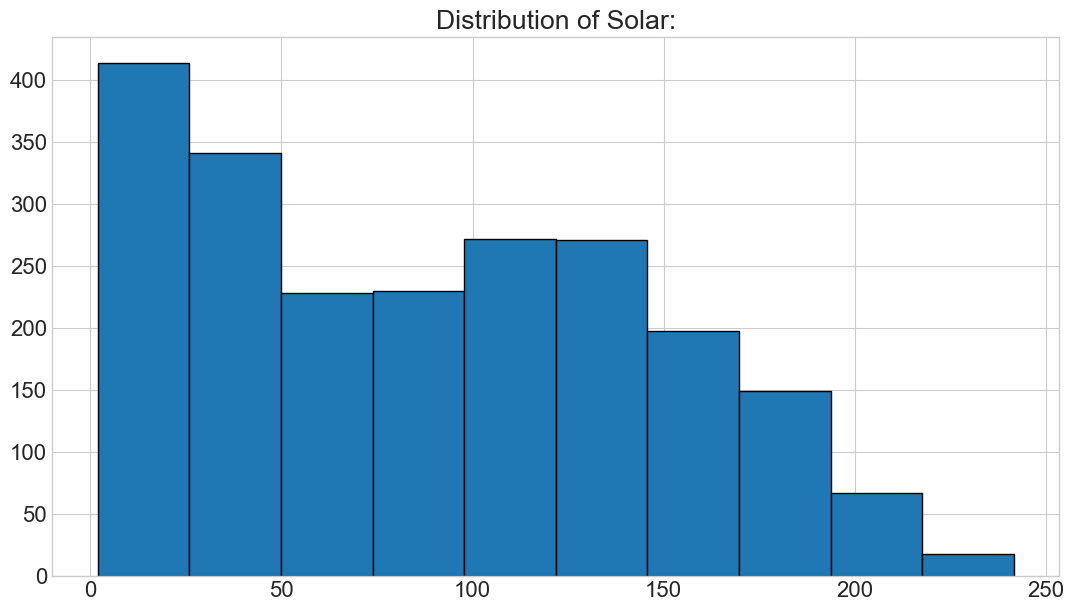

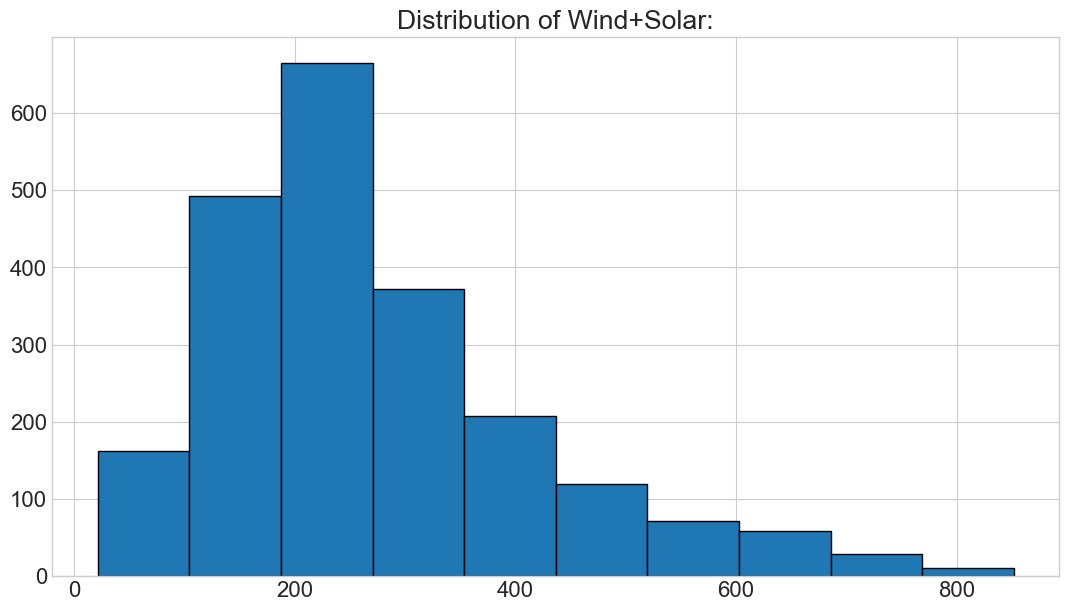

In [35]:
for col in df.columns:
    plt.hist(df[col], edgecolor='black')
    plt.title(f'Distribution of {col}:')
    plt.show()

####  Set the index to be the datetime variable.

In [49]:
df = df.set_index('Date').sort_index()

In [50]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


####  Add a month and a year column to your dataframe.

In [51]:
df['month'] = df.index.month_name()

In [52]:
df['year'] = df.index.year

####  Fill any missing values.

In [53]:
df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [54]:
df = df.fillna(0)

In [55]:
df.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

####  Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [63]:
def prep_ops_data(df):
    '''
    prep_ops_data takes in germany_ops_data df, converts Date col to datetime,
    sets it as the index, adds col for month and a col for year, the fills null
    values, renames columns to remove capitalization. 
    '''
    # convert date dtype to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # set it as the index
    df = df.set_index('Date').sort_index()
    # rename columns to remove capitalization
    df = df.rename(columns={'Consumption':'consumption', 'Wind':'wind', 'Solar':'solar','Wind+Solar':'wind_solar'})
    
    # create col for month
    df['month'] = df.index.month_name()
    # create col for year
    df['year'] = df.index.year
    #fill nulls with 0
    df = df.fillna(0)
    
    return df

In [64]:
df = a.get_germany_ops_data()

In [66]:
df = prep_ops_data(df)

In [67]:
df.head()

,consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
